In [1]:
import zipfile
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# Розпаковуємо файл data.zip
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Перевіряємо вміст розпакованої папки
print("Вміст папки 'data':", os.listdir('data'))
print("Вміст папки 'data/data':", os.listdir('data/data'))

# Завантажуємо датасети
data_2d_path = 'data/data/data_2d.csv'
mnist_path = 'data/data/mnist.csv'

# Завантажуємо data_2d.csv
if os.path.isfile(data_2d_path):
    data_2d = pd.read_csv(data_2d_path)
    print("data_2d.csv завантажено успішно.")
else:
    print("Файл data_2d.csv не знайдено.")

# Завантажуємо mnist.csv
if os.path.isfile(mnist_path):
    mnist = pd.read_csv(mnist_path)
    print("mnist.csv завантажено успішно.")
else:
    print("Файл mnist.csv не знайдено.")

# Перевіряємо імена стовпців
print(data_2d.head())
print(data_2d.columns)

Вміст папки 'data': ['data']
Вміст папки 'data/data': ['mnist.csv', 'data_2d.csv']
data_2d.csv завантажено успішно.
mnist.csv завантажено успішно.
   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  
Index(['0.000000000000000000e+00', '-7.687164597386728637e-01',
       '4.608603078297135447e-01'],
      dtype='object')


In [3]:
print("Перші 5 строк data_2d:")
data_2d.head()

Перші 5 строк data_2d:


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [4]:
print("Перші 5 строк mnist:")
mnist.head()

Перші 5 строк mnist:


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Інформація про data_2d
data_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   0.000000000000000000e+00   199 non-null    float64
 1   -7.687164597386728637e-01  199 non-null    float64
 2   4.608603078297135447e-01   199 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [6]:
# Інформація про mnist
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 3.0 MB


In [7]:
# Статистичні дані для data_2d
data_2d.describe()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
count,199.000000,199.000000,199.000000
mean,0.502513,1.771587,2.220299
std,0.501255,1.230001,1.604383
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.880885,0.979439
50%,1.000000,1.736607,2.283748
75%,1.000000,2.707277,3.608612
max,1.000000,4.554605,5.722027


In [8]:
# Статистичні дані для mnist
mnist.describe()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,499.000000,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0,...,499.000000,499.000000,499.0,499.0,499.0,499.0,499.0,499.0,499.0,499.0
mean,4.372745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.507014,0.256513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.874437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.325835,5.730067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(mnist.columns)

Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)


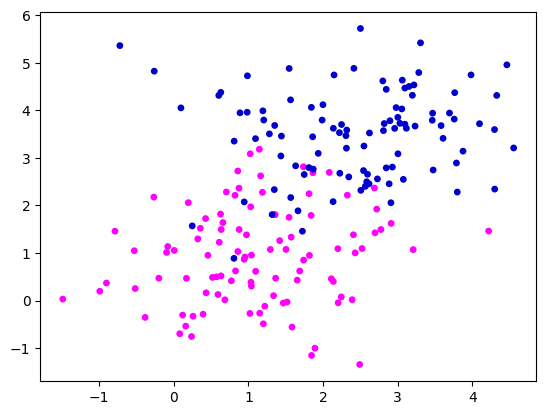

In [10]:
# для візуалізації даних із файлу data_2D.csv
colors = ['magenta' if label == 0 else 'mediumblue' for label in data_2d.values[:, 0]]
# data_2d.values[:,1]: Значення для осі X (другий стовпець даних).
# data_2d.values[:,2]: Значення для осі Y (третій стовпець даних).
# s = 15: Розмір точок на графіку.
plt.scatter(data_2d.values[:,1], data_2d.values[:,2], c = colors, s=15)
plt.show()

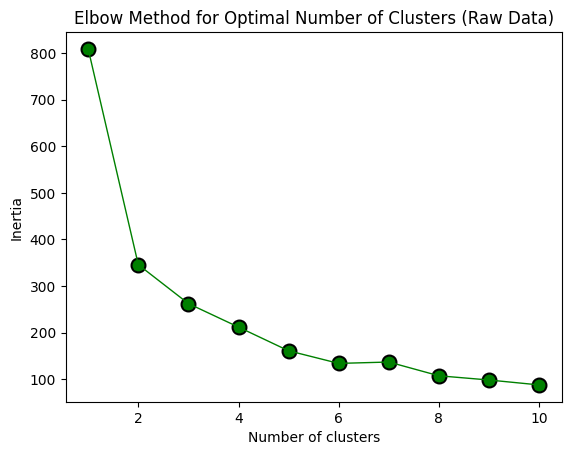

In [11]:
# метод "ліктя" без масштабування

X_2d = data_2d.drop(data_2d.columns[0], axis=1)

k_range = range(1, 11)

inertia = []
for i in k_range:
    kmean = KMeans(n_clusters=i, n_init='auto').fit(X_2d)
    inertia.append(kmean.inertia_)

# Побудова графіка методу "ліктя" для не масштабованих даних
plt.plot(k_range, inertia, marker='^', color='green', linewidth=1)
plt.title('Elbow Method for Optimal Number of Clusters (Raw Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.scatter(k_range, inertia, color='green', edgecolor='black', linewidth=1.5, marker='o', s=100)
plt.show()

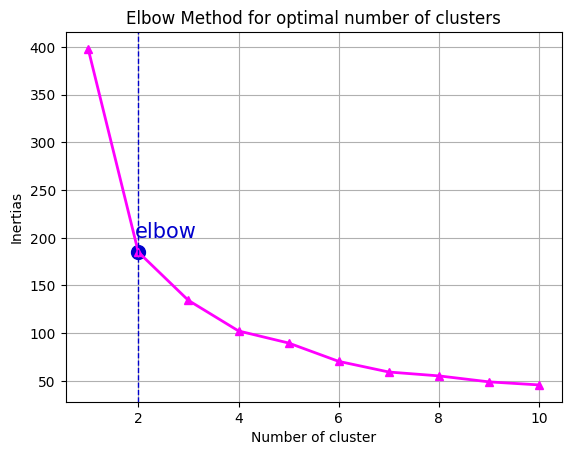

In [12]:
# Масштабування даних:
# масштабує дані, наводячи їх до стандартного виду (з нульовим середнім та одиничною дисперсією).
scaler = StandardScaler()
X_2d_norm = scaler.fit_transform(X_2d)

# Визначення діапазону значень числа кластерів:
k_range = range(1, 11)

inertia = []
for i in k_range:
  kmean = KMeans(n_clusters=i, n_init='auto').fit(X_2d_norm)
  inertia.append(kmean.inertia_)

# Побудова графіка методу "ліктя":
plt.plot(k_range, inertia, marker='^', color='magenta',  linewidth=2)
plt.title('Elbow Method for optimal number of clusters')
plt.xlabel('Number of cluster')
plt.ylabel('Inertias')
# Додавання точки та анотації для ліктя
plt.scatter(k_range[1], inertia[1], c='mediumblue', marker='o', s=100)
plt.annotate('elbow', (k_range[1], inertia[1]), textcoords="offset points", xytext=(20, 10), ha='center', fontsize=15, color='mediumblue')

# Додавання вертикальної лінії для ліктя
plt.axvline(x=k_range[1], color='mediumblue', linestyle='--', linewidth=1)

plt.grid()
plt.show()

Оптимальна кількість кластерів для 'data_2d.csv' = 2

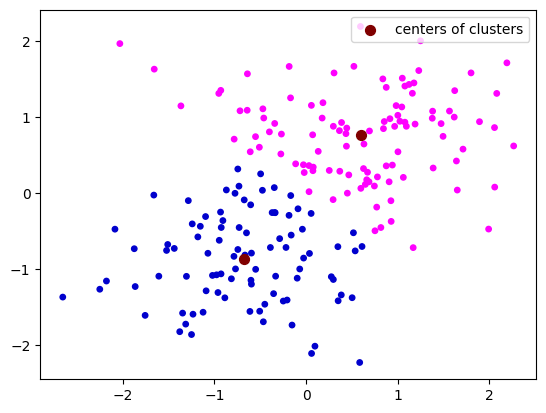

In [13]:
# кластеризація даних методом K-means.
kmeans = KMeans(n_clusters=2, n_init='auto').fit(X_2d_norm)


colors = ['magenta' if label == 0 else 'mediumblue' for label in kmeans.labels_]

plt.scatter(x=X_2d_norm[:, 0], y=X_2d_norm[:, 1], c=colors, s=15)

plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='o', s=50, c='maroon', label='centers of clusters')

plt.legend(fontsize=10, loc='upper right')
plt.show()


In [14]:
# цей код спочатку нормалізує дані, потім скорочує їх до двох вимірювань за допомогою PCA,
# і виводить основні статистичні характеристики для отриманих даних.

# Нормалізація даних: дані mnist (MNIST) нормалізуються з використанням StandardScaler.
# Це означає, що дані приводяться до стандартного вигляду, де середнє значення дорівнює 0, а стандартне відхилення дорівнює 1.
X_mnist_norm = StandardScaler().fit_transform(mnist)

# Зменшення розмірності: дані перетворюються за допомогою методу основних компонентів (PCA). Параметр n_components=2 показує, що необхідно
# скоротити розмірність даних до двох вимірів. Це робиться для того, щоб спростити дані та зробити їх придатними для візуалізації чи подальшої обробки.
X_pca = PCA(n_components=2).fit_transform(X_mnist_norm)

# Опис даних: Цей код створює DataFrame з даних X_pca і викликає метод describe(), який виводить основні
# статистичні характеристики для кожного з двох вимірювань: середнє значення, стандартне відхилення, мінімальне та
# максимальне значення, та квартильні значення (25%, 50%, 75%). Потім результати округляються до трьох знаків після коми за допомогою round(3).
pd.DataFrame(X_pca).describe().round(3)

,0,1
count,499.000,499.000
mean,-0.000,-0.000
std,6.490,5.427
min,-9.082,-12.443
25%,-4.568,-4.085
50%,-1.265,-0.976
75%,2.968,3.621
max,26.646,15.625


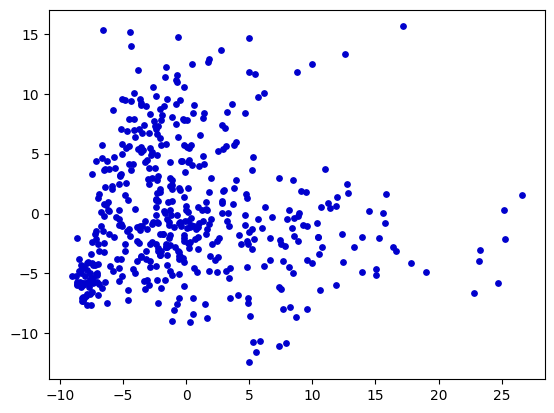

In [15]:
# будуємо графік точок за даними після застосування PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=15, c='mediumblue')
plt.show()
# Плоский графік точок, де всі точки пофарбовані в один колір (mediumblue),
# показує розподіл даних після застосування PCA, без урахування будь-яких міток чи відмінностей між групами.


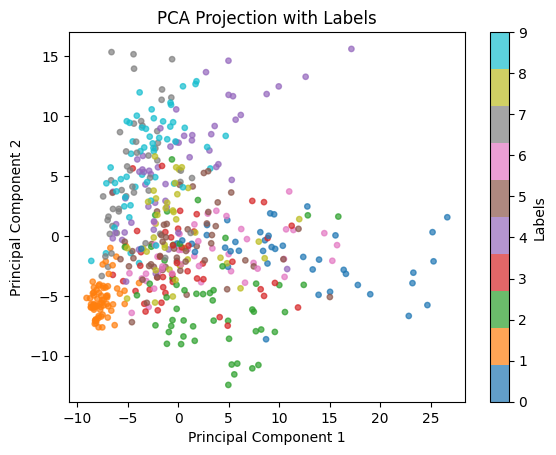

In [16]:
# щоб показати, як дані розподіляються за класами після застосування PCA. Використовується колірна карта (cmap='tab10') для відображення різних класів,
# що допомагає візуалізувати різницю між ними.
# Вилучення міток з першого стовпця
y_mnist = mnist.iloc[:, 0].values

# Побудова графіка з кольорами в залежності від міток
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_mnist, cmap='tab10', s=15, alpha=0.7)
plt.colorbar(label='Labels') # Додаємо колірну шкалу
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with Labels')
plt.show()

In [17]:
# знаходимо оптимальну кількість кластерів для даних після застосування PCA
# Створюється порожній список, куди будуть зберігатися значення інерції (показник якості кластеризації).
inertias = []
k_range = range(1,11)

for i in k_range:
  kmean = KMeans(n_clusters=i, n_init='auto').fit(X_pca)
  inertias.append(kmean.inertia_)

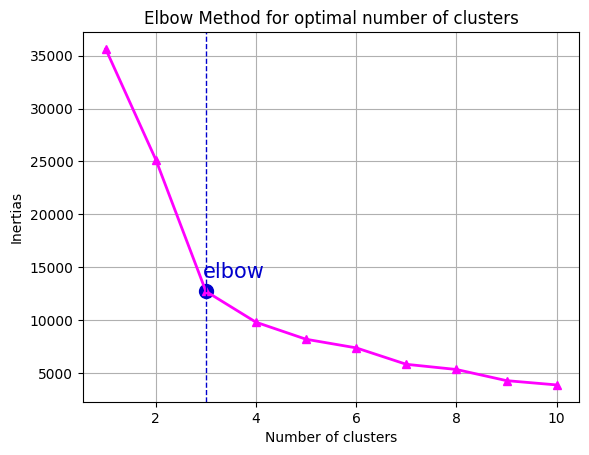

In [18]:
plt.plot(k_range, inertias, marker='^', color='magenta', linewidth=2)
plt.scatter(k_range[2], inertias[2], marker='o', s=100, c='mediumblue')
plt.annotate('elbow', (k_range[2], inertias[2]), textcoords='offset points', xytext=(20, 10), ha='center', fontsize=15, color='mediumblue')
plt.axvline(x=k_range[2], color='mediumblue', linestyle='--', linewidth=1)
plt.title('Elbow Method for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.grid()
plt.show()

In [19]:
# метод сілуетів

from sklearn.metrics import silhouette_score

random_state = 170
k_range = range(2,11)
silhouette_scores_kmeans = []
silhouette_scores_gmm = []


for k in k_range:
  kmean = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
  label_kmeans = kmean.fit_predict(X_pca)
  score = silhouette_score(X_pca, label_kmeans)
  silhouette_scores_kmeans.append(score)



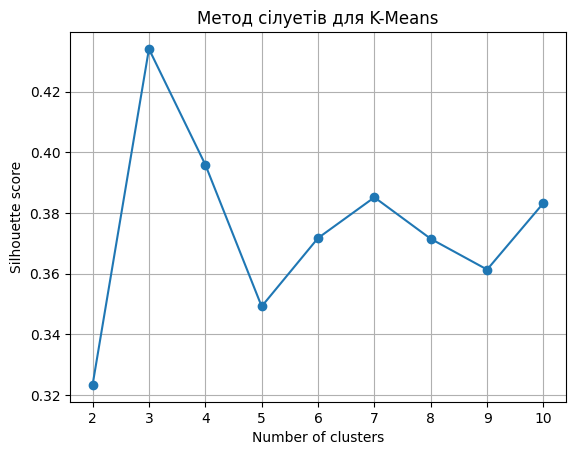

In [20]:
plt.plot(k_range, silhouette_scores_kmeans, marker='o') #  , color='magenta', linewidth=2)
plt.title('Метод сілуетів для K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

Оптимальна кількість кластерів для 'mnist.csv' = 3

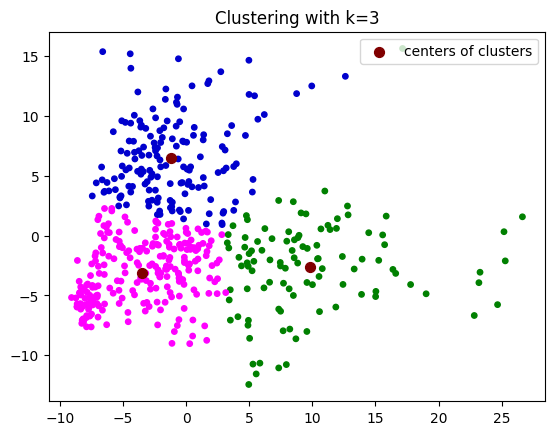

In [21]:
# алгоритм K-means для кластеризації даних MNIST, зменшених до 2 вимірювань за допомогою PCA.
kmeans_mnist = KMeans(n_clusters=3, n_init='auto').fit(X_pca)

colors = ['mediumblue', 'green', 'magenta']

plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=kmeans_mnist.labels_, s=15, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x=kmeans_mnist.cluster_centers_[:, 0], y=kmeans_mnist.cluster_centers_[:, 1], marker='o', c='maroon', s=50, label='centers of clusters')
plt.legend(fontsize=10, loc='upper right')
plt.title('Clustering with k=3')
plt.show()